### 1. Data Infomation:
- The dataset of this project inclueded 62000 salary records from top tech companies, the data was scraped off from levels.fyi


- Data contains infomation including company name, job title, positon level,etc.


- Data url: https://www.kaggle.com/datasets/jackogozaly/data-science-and-stem-salaries?datasetId=1640011&sortBy=commentCount


### 2. Identify Problom
I'm curious how much money can different people make in tech industry make. So i found this data set from kaggle, it was scraped from level.fyi, a webiste that users can report their salary based on their own situation.  The data set shows that how much people make with different backgrounds. 

This project will be a supervised machine learning proloem, since I'm trying to predict salary, I will try to use some regression model to achevie that.

### 3. EDA

#### 3.1 Loading Data

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [56]:
df = pd.read_csv('./Levels_Fyi_Salary_Data.csv')
print('The full data set has {} samples, {} features.'.format(df.shape[0], df.shape[1]))
df.head()

The full data set has 62642 samples, 29 features.


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,6/7/2017 11:33:27,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
1,6/10/2017 17:11:29,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,6/11/2017 14:53:57,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000.0,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0.0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                62642 non-null  object 
 1   company                  62637 non-null  object 
 2   level                    62523 non-null  object 
 3   title                    62642 non-null  object 
 4   totalyearlycompensation  62642 non-null  int64  
 5   location                 62642 non-null  object 
 6   yearsofexperience        62642 non-null  float64
 7   yearsatcompany           62642 non-null  float64
 8   tag                      61788 non-null  object 
 9   basesalary               62642 non-null  float64
 10  stockgrantvalue          62642 non-null  float64
 11  bonus                    62642 non-null  float64
 12  gender                   43102 non-null  object 
 13  otherdetails             40137 non-null  object 
 14  cityid                

<AxesSubplot:>

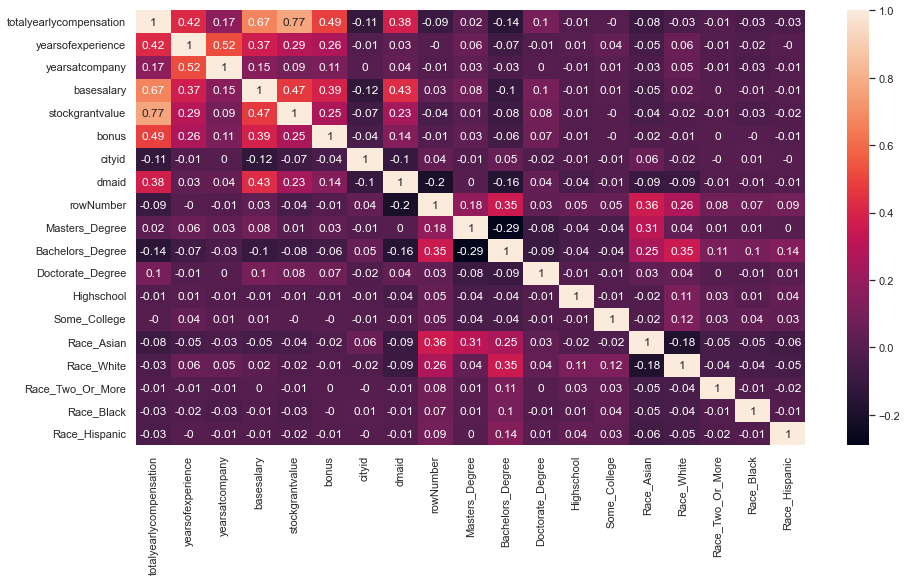

In [6]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.corr().round(2), annot=True,)

#### 3.2 Select response feature

/Users/lak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/lak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

<AxesSubplot:xlabel='bonus'>

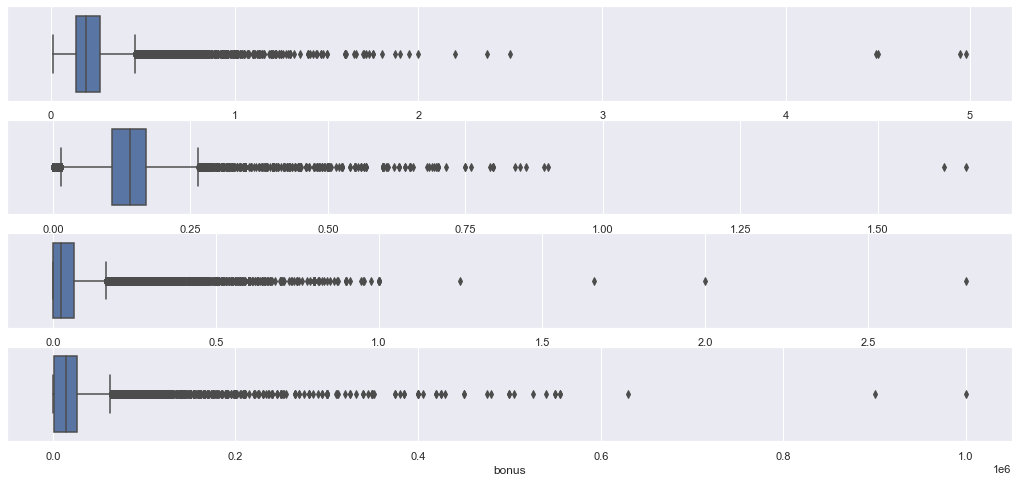

In [23]:
fig, ax = plt.subplots( nrows = 4, figsize = (18,8) )  
sns.boxplot( df['totalyearlycompensation'], ax = ax[0])
sns.boxplot( df['basesalary'], ax = ax[1])
sns.boxplot( df['stockgrantvalue'], ax = ax[2])
sns.boxplot( df['bonus'], ax = ax[3])

As the above heatmap shows, total yearly compensation have strong correlation with base salary, stock grant value and bonus. I mostly care about thr total salary, so ill drop the rest of the columns. 

From the boxplot shows that there are some outlier values of total salary, to reduce the influence of those values have on the model, I decide to drop them.

/Users/lak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='totalyearlycompensation'>

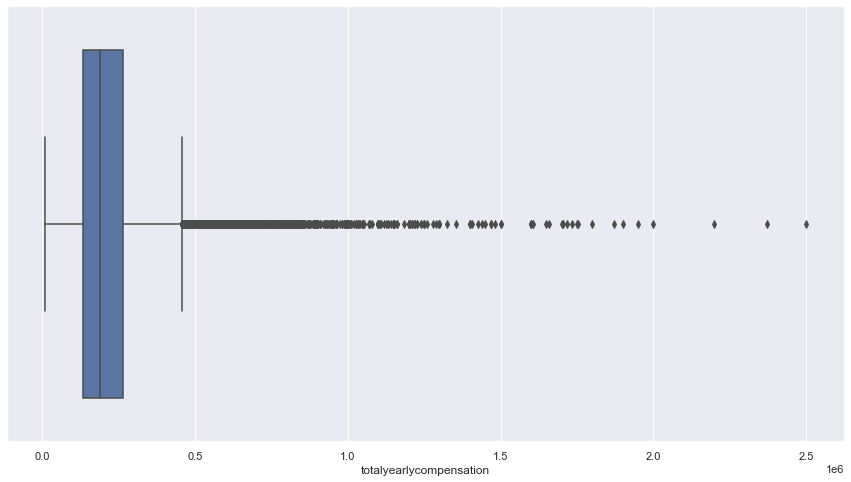

In [24]:
q95 = np.quantile(df['totalyearlycompensation'],0.99995)
df=df[df['totalyearlycompensation'] < q95]
sns.boxplot( df['totalyearlycompensation'])

### 3. Handle missing values

In [7]:
# check for null values percentage
df['timestamp']=pd.to_datetime(df['timestamp'])
missing_data_percentage = df.isnull().sum()/df.shape[0]
print(missing_data_percentage)

timestamp                  0.000000
company                    0.000080
level                      0.001900
title                      0.000000
totalyearlycompensation    0.000000
location                   0.000000
yearsofexperience          0.000000
yearsatcompany             0.000000
tag                        0.013633
basesalary                 0.000000
stockgrantvalue            0.000000
bonus                      0.000000
gender                     0.311931
otherdetails               0.359264
cityid                     0.000000
dmaid                      0.000032
rowNumber                  0.000000
Masters_Degree             0.000000
Bachelors_Degree           0.000000
Doctorate_Degree           0.000000
Highschool                 0.000000
Some_College               0.000000
Race_Asian                 0.000000
Race_White                 0.000000
Race_Two_Or_More           0.000000
Race_Black                 0.000000
Race_Hispanic              0.000000
Race                       0

In [8]:
# drop the columns that's not really usefull or are repetition
df = df.drop(['tag', 'otherdetails','rowNumber','location','cityid','Race', 'Education','timestamp'], axis=1)

In [9]:
# drop null value of level and dmaid since the precentage is low
df = df.dropna(subset=['level','dmaid'])

In [10]:
df["gender"].fillna("Unknown", inplace = True) 
df = df.astype({'company':'category'})
df = df.astype({'level':'category'})
df = df.astype({'title':'category'})
df = df.astype({'gender':'category'})

In [11]:
df = pd.get_dummies(df,columns=['company','level','title','gender'])

### 4. Data Modeling

In [12]:
# split the data into trainin and testing set
x = df.drop(['totalyearlycompensation','basesalary','stockgrantvalue','bonus'], axis=1)
y = df['totalyearlycompensation']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1234)

In [13]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(50016, 4583) (12505, 4583) (50016,) (12505,)


In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [15]:
pipelines = {
    'rg':make_pipeline(Ridge(random_state=1234)),
    'la':make_pipeline(Lasso(random_state=1234)),
    'en':make_pipeline(ElasticNet(random_state=1234)),
    'rfr':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gbr':make_pipeline(GradientBoostingRegressor(random_state=1234)),
}

hypergrid={
    'rg':{'ridge__alpha':np.logspace(-2^5, 2^5, 5)},
    'la':{'lasso__alpha':np.logspace(-2^5, 2^5, 5)},
    'en':{'elasticnet__alpha':np.logspace(-2^5, 2^5, 5)},
    'rfr':{
       'randomforestregressor__min_samples_split':[2,3,4,5],
       'randomforestregressor__min_samples_leaf':[1,2,3],
       'ccp_alpha':np.logspace(-2^5, 2^5, 15),
    },
    'gbr':{
        'gradientboostingregressor__alpha':np.logspace(-2^5, 2^5, 5)
    }
}

In [13]:
fitted_models = {}
for algo, pipeline in pipelines.items():
  model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
  try:
    print('Strat training for {}.'.format(algo))
    model.fit(x_train, y_train)
    fitted_models[algo] = model
    print('{} has been successfully fit.'.format(algo))
  except NotFittedError as e:
    print(repr(e))

Strat training for rfr.
rfr has been successfully fit.
Strat training for gbr.


/Users/lak/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/lak/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/lak/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/lak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 448, in fit
    self._check_params()
  File "/Users/lak/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py", line 270, in _check_params
    raise ValueError("alpha must be in (0.0, 1.0) but "
ValueError: alpha must be in (0.0, 1.0) but was 10.0

  warnings.warn("Estimator fit failed. The s

gbr has been successfully fit.


In [14]:
from sklearn.metrics import r2_score, mean_absolute_error

for algo, model in fitted_models.items():
  yhat = model.predict(x_test)
  print('{} scores R2: {} MAE: {}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))

rfr scores R2: 0.7087299248171792 MAE: 42360.87098227968
gbr scores R2: 0.5905425754946277 MAE: 56890.835865225985


In [58]:
best_model = fitted_models['rfr']
best_model.predict(x_test)

array([441980.42857143, 164580.27718343, 170494.55880231, ...,
       466443.96031746,  57314.31096681, 102699.97619048])

In [67]:
# save the model with joblib
import joblib
# joblib.dump(best_model, 'salary_prediction.joblib') 
spm = joblib.load('./salary_prediction.joblib')
y_pred = spm.predict(x_test)

### 5. Result and Analysis

The best model I got from the project is Ramdon Forest Regressor. It achieve an R2 score of around 70%, and MAE of around 42000.


In [78]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.2283626164491084

### 6. Discussion and Conclusion
What I learn from this project is that random forest is a good machine learning model for complex data, but is also really time-consuming. With all the categorical variables get convert into one-hot encoding, I got more than 4000 features, it took me overnight to train the model!

The accuracy on the test set was really ideal, R2 only around 70%, It could be better if I try more hyperparameter tunning with GridSearch but I cost too much time to do that.

The way to improve this will be to reduce the feature of the model, and try out different faster algorithms.